In [16]:
%load_ext autoreload  
%autoreload 2  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [linear1_a, linear1_b]


Output()

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 35 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


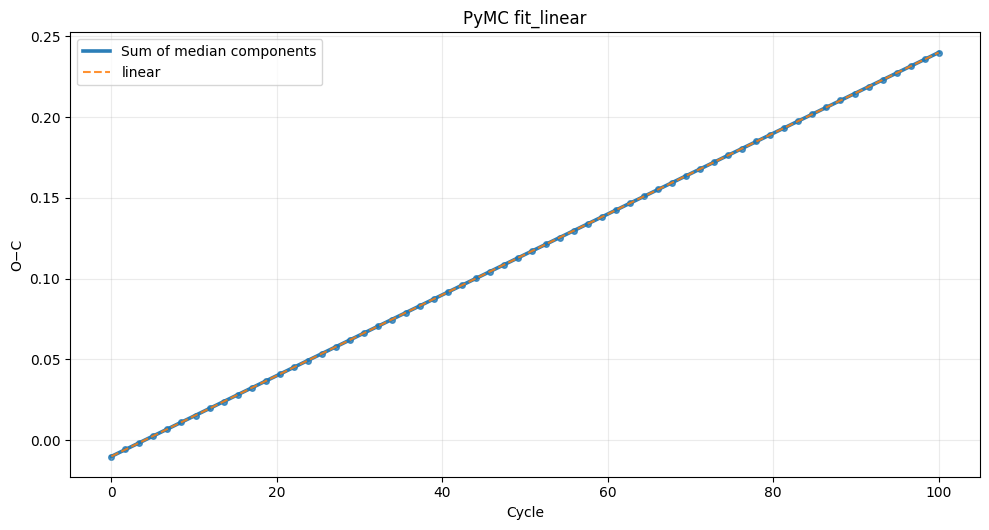

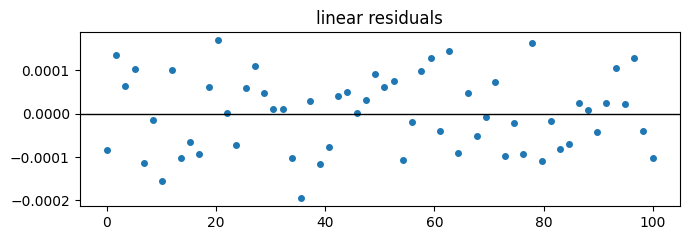

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

from ocpy.oc_pymc import OCPyMC
from ocpy.oc import Linear, Quadratic, Sinusoidal, Keplerian, Parameter


x1 = np.linspace(0, 100, 60)
y1_true = 0.0025 * x1 - 0.01
y1 = y1_true + np.random.normal(0.0, 1e-4, size=x1.size)
err1 = np.full_like(x1, 1e-4)
oc1 = OCPyMC(
    oc=y1.tolist(),
    cycle=x1.tolist(),
    minimum_time_error=err1.tolist(),
    minimum_time=[np.nan] * x1.size,
)
idata_lin = oc1.fit_linear(draws=1000, tune=1000, chains=2, progressbar=True)
oc1.fit_and_report(idata_lin, title="PyMC fit_linear")
resid_lin = oc1.residue(idata_lin)
plt.figure(figsize=(7, 2.5))
plt.scatter(resid_lin.data["cycle"], resid_lin.data["oc"], s=16)
plt.axhline(0.0, color="k", lw=1)
plt.title("linear residuals")
plt.tight_layout()

[autoreload of cutils_ext failed: Traceback (most recent call last):
  File "c:\Users\Bar1\anaconda3\envs\ocpy\Lib\site-packages\IPython\extensions\autoreload.py", line 325, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\Bar1\anaconda3\envs\ocpy\Lib\site-packages\IPython\extensions\autoreload.py", line 580, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "c:\Users\Bar1\anaconda3\envs\ocpy\Lib\importlib\__init__.py", line 168, in reload
    raise ModuleNotFoundError(f"spec not found for the module {name!r}", name=name)
ModuleNotFoundError: spec not found for the module 'cutils_ext'
]
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sinusoidal1_amp, sinusoidal1_P]
Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 9 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


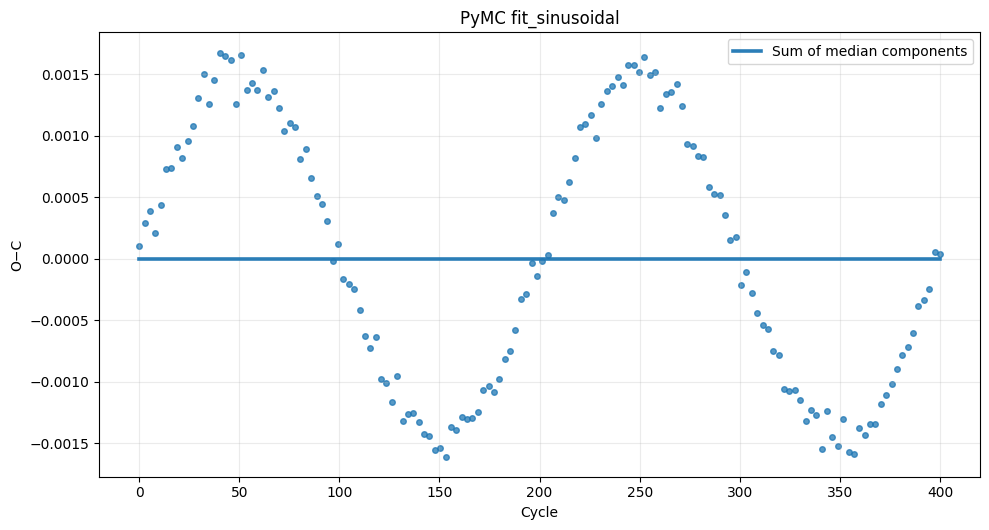

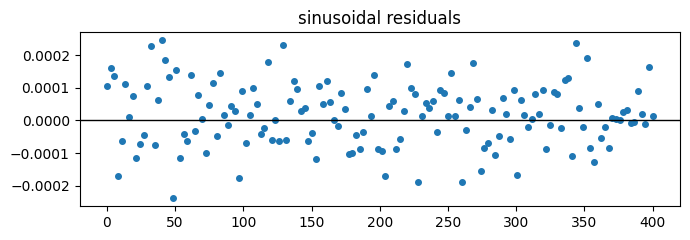

In [18]:
x3 = np.linspace(0, 400, 150)
y3_true = 0.0015 * np.sin(2.0 * np.pi * x3 / 200.0)
y3 = y3_true + np.random.normal(0.0, 1e-4, size=x3.size)
err3 = np.full_like(x3, 1e-4)
oc3 = OCPyMC(
    oc=y3.tolist(),
    cycle=x3.tolist(),
    minimum_time_error=err3.tolist(),
    minimum_time=[np.nan] * x3.size,
)
idata_sin = oc3.fit_sinusoidal(
    amp_start=1e-3,
    P_start=200.0,
    P_min=50.0,
    P_max=400.0,
    draws=1000,
    tune=1000,
    chains=2,
    progressbar=False,
)
oc3.fit_and_report(idata_sin, title="PyMC fit_sinusoidal")
resid_sin = oc3.residue(idata_sin)
plt.figure(figsize=(7, 2.5))
plt.scatter(resid_sin.data["cycle"], resid_sin.data["oc"], s=16)
plt.axhline(0.0, color="k", lw=1)
plt.title("sinusoidal residuals")
plt.tight_layout()

[autoreload of cutils_ext failed: Traceback (most recent call last):
  File "c:\Users\Bar1\anaconda3\envs\ocpy\Lib\site-packages\IPython\extensions\autoreload.py", line 325, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\Bar1\anaconda3\envs\ocpy\Lib\site-packages\IPython\extensions\autoreload.py", line 580, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "c:\Users\Bar1\anaconda3\envs\ocpy\Lib\importlib\__init__.py", line 168, in reload
    raise ModuleNotFoundError(f"spec not found for the module {name!r}", name=name)
ModuleNotFoundError: spec not found for the module 'cutils_ext'
]
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [keplerian1_amp, keplerian1_e, keplerian1_omega, keplerian1_P, keplerian1_T0]
Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 56 seconds.
There were 112 divergences after tuning. Increase `target_accept` or reparameter

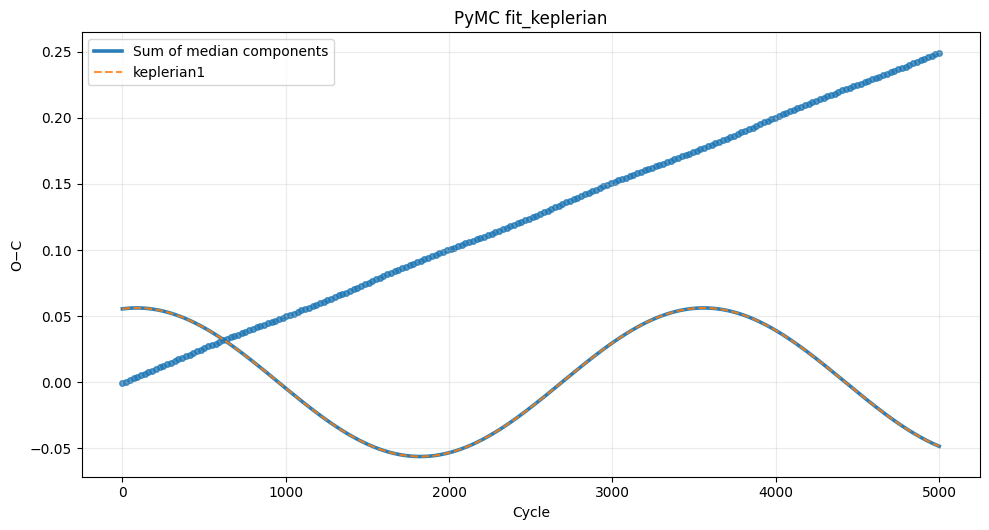

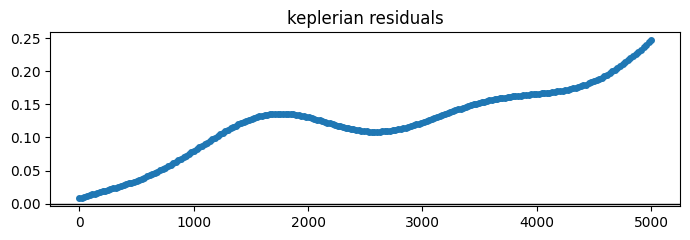

In [19]:
x4 = np.linspace(0, 5000, 220)
y4_true = 0.00005 * x4 + 0.0008 * np.sin(2.0 * np.pi * (x4 - 300.0) / 1200.0)
y4 = y4_true + np.random.normal(0.0, 1e-4, size=x4.size)
err4 = np.full_like(x4, 1e-4)
oc4 = OCPyMC(
    oc=y4.tolist(),
    cycle=x4.tolist(),
    minimum_time_error=err4.tolist(),
    minimum_time=[np.nan] * x4.size,
)
idata_kep = oc4.fit_keplerian(
    amp_start=8e-4,
    P_start=1200.0,
    P_min=200.0,
    P_max=5000.0,
    draws=1000,
    tune=1000,
    chains=2,
    progressbar=False,
)
oc4.fit_and_report(idata_kep, title="PyMC fit_keplerian")
resid_kep = oc4.residue(idata_kep)
plt.figure(figsize=(7, 2.5))
plt.scatter(resid_kep.data["cycle"], resid_kep.data["oc"], s=16)
plt.axhline(0.0, color="k", lw=1)
plt.title("keplerian residuals")
plt.tight_layout()

[autoreload of cutils_ext failed: Traceback (most recent call last):
  File "c:\Users\Bar1\anaconda3\envs\ocpy\Lib\site-packages\IPython\extensions\autoreload.py", line 325, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\Bar1\anaconda3\envs\ocpy\Lib\site-packages\IPython\extensions\autoreload.py", line 580, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "c:\Users\Bar1\anaconda3\envs\ocpy\Lib\importlib\__init__.py", line 168, in reload
    raise ModuleNotFoundError(f"spec not found for the module {name!r}", name=name)
ModuleNotFoundError: spec not found for the module 'cutils_ext'
]
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [linear1_a, linear1_b, sinusoidal2_amp, sinusoidal2_P]
Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 14 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


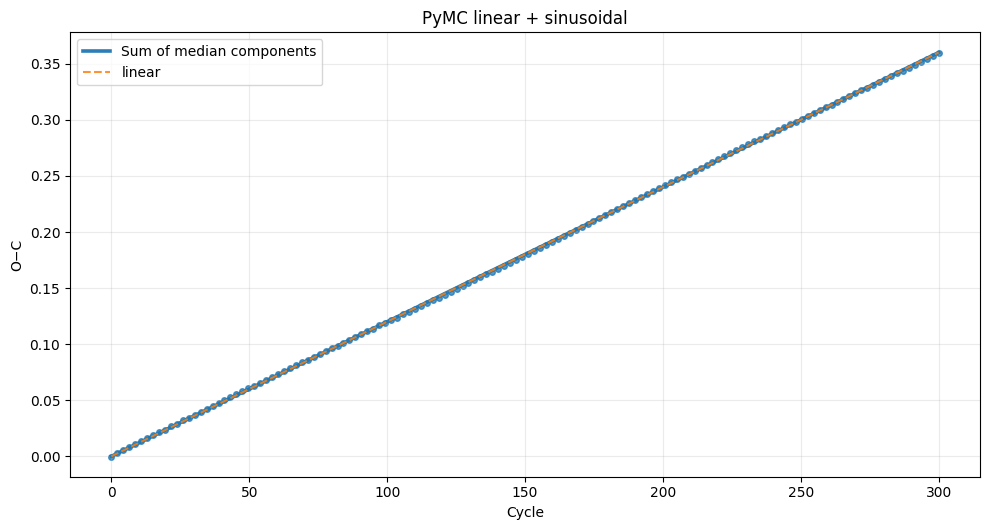

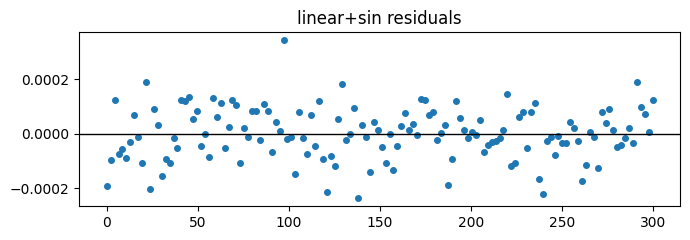

In [20]:
x5 = np.linspace(0, 300, 140)
y5_true = 0.0012 * x5 + 0.001 * np.sin(2.0 * np.pi * x5 / 180.0)
y5 = y5_true + np.random.normal(0.0, 1e-4, size=x5.size)
err5 = np.full_like(x5, 1e-4)
oc5 = OCPyMC(
    oc=y5.tolist(),
    cycle=x5.tolist(),
    minimum_time_error=err5.tolist(),
    minimum_time=[np.nan] * x5.size,
)
comp_lin = Linear(a=Parameter(value=0.0, fixed=False), b=Parameter(value=0.0, fixed=False))
comp_sin = Sinusoidal(
    amp=Parameter(value=1e-3, min=0.0, fixed=False),
    P=Parameter(value=180.0, min=50.0, max=400.0, fixed=False),
)
idata_mix = oc5.fit(
    [comp_lin, comp_sin],
    draws=1000,
    tune=1000,
    chains=2,
    progressbar=False,
)
oc5.fit_and_report(idata_mix, title="PyMC linear + sinusoidal")
resid_mix = oc5.residue(idata_mix)
plt.figure(figsize=(7, 2.5))
plt.scatter(resid_mix.data["cycle"], resid_mix.data["oc"], s=16)
plt.axhline(0.0, color="k", lw=1)
plt.title("linear+sin residuals")
plt.tight_layout()

plt.show()

Initializing NUTS using jitter+adapt_diag...
c:\Users\Bar1\anaconda3\envs\ocpy\Lib\site-packages\pytensor\link\c\cmodule.py:2986: UserWarning: PyTensor could not link to a BLAS installation. Operations that might benefit from BLAS will be severely degraded.
This usually happens when PyTensor is installed via pip. We recommend it be installed via conda/mamba/pixi instead.
Alternatively, you can use an experimental backend such as Numba or JAX that perform their own BLAS optimizations, by setting `pytensor.config.mode == 'NUMBA'` or passing `mode='NUMBA'` when compiling a PyTensor function.
For more options and details see https://pytensor.readthedocs.io/en/latest/troubleshooting.html#how-do-i-configure-test-my-blas-library
  warnings.warn(
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [linear1_a, linear1_b, kep12_amp, kep12_e, kep12_omega, kep12_P, kep12_T0]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 2316 seconds.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


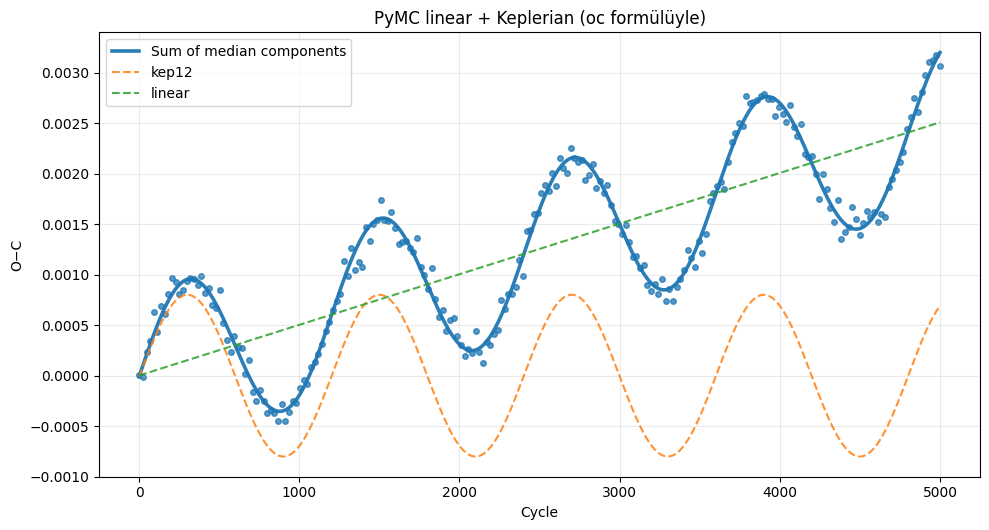

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ocpy.oc import Linear, Keplerian, Parameter
from ocpy.oc_pymc import OCPyMC

# 1) x ekseni
x6 = np.linspace(0, 5000, 220)

# 2) "gerçek" parametreler
a_true = 5e-7            # lineer eğim
b_true = 0.0

kep_amp   = 8e-4         # keplerian OC genliği
kep_e     = 0.0          # dairesel olsun
kep_omega = 90.0         # derece
kep_P     = 1200.0       # cycle cinsinden
kep_T0    = 300.0        # periastron

# 3) oc'daki Keplerian ile sentetik veri üret
kep_true = Keplerian(
    amp=Parameter(value=kep_amp,   fixed=True),
    e=Parameter(value=kep_e,       fixed=True),
    omega=Parameter(value=kep_omega, fixed=True),
    P=Parameter(value=kep_P,       fixed=True),
    T0=Parameter(value=kep_T0,     fixed=True),
    name="kep1",
)

# lineer + keplerian
y6_true = a_true * x6 + kep_true.model_func(
    x6,
    kep_amp,
    kep_e,
    kep_omega,
    kep_P,
    kep_T0,
)

# gürültü ekle
noise = np.random.normal(0.0, 1e-4, size=x6.size)
y6 = y6_true + noise
err6 = np.full_like(x6, 1e-4)

# 4) PyMC O-C nesnesi
oc6 = OCPyMC(
    oc=y6.tolist(),
    cycle=x6.tolist(),
    minimum_time_error=err6.tolist(),
    minimum_time=[np.nan] * x6.size,
)

# 5) fit edilecek bileşenler (lineer + keplerian)
comp_lin6 = Linear(
    a=Parameter(value=0.0),
    b=Parameter(value=0.0),
)
comp_kep6 = Keplerian(
    amp=Parameter(value=8e-4, min=0.0),
    e=Parameter(value=0.0, min=0.0, max=0.9),
    omega=Parameter(value=90.0),
    P=Parameter(value=1200.0, min=200.0, max=5000.0),
    T0=Parameter(value=300.0),
    name="kep1",
)

idata_mix2 = oc6.fit(
    [comp_lin6, comp_kep6],
    draws=2000,
    tune=2000,
    chains=4,
    target_accept=0.9,
    progressbar=True,
)

oc6.fit_and_report(idata_mix2, title="PyMC linear + Keplerian (oc formülüyle)")

[autoreload of cutils_ext failed: Traceback (most recent call last):
  File "c:\Users\Bar1\anaconda3\envs\ocpy\Lib\site-packages\IPython\extensions\autoreload.py", line 325, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\Bar1\anaconda3\envs\ocpy\Lib\site-packages\IPython\extensions\autoreload.py", line 580, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "c:\Users\Bar1\anaconda3\envs\ocpy\Lib\importlib\__init__.py", line 168, in reload
    raise ModuleNotFoundError(f"spec not found for the module {name!r}", name=name)
ModuleNotFoundError: spec not found for the module 'cutils_ext'
]


<Figure size 800x800 with 0 Axes>

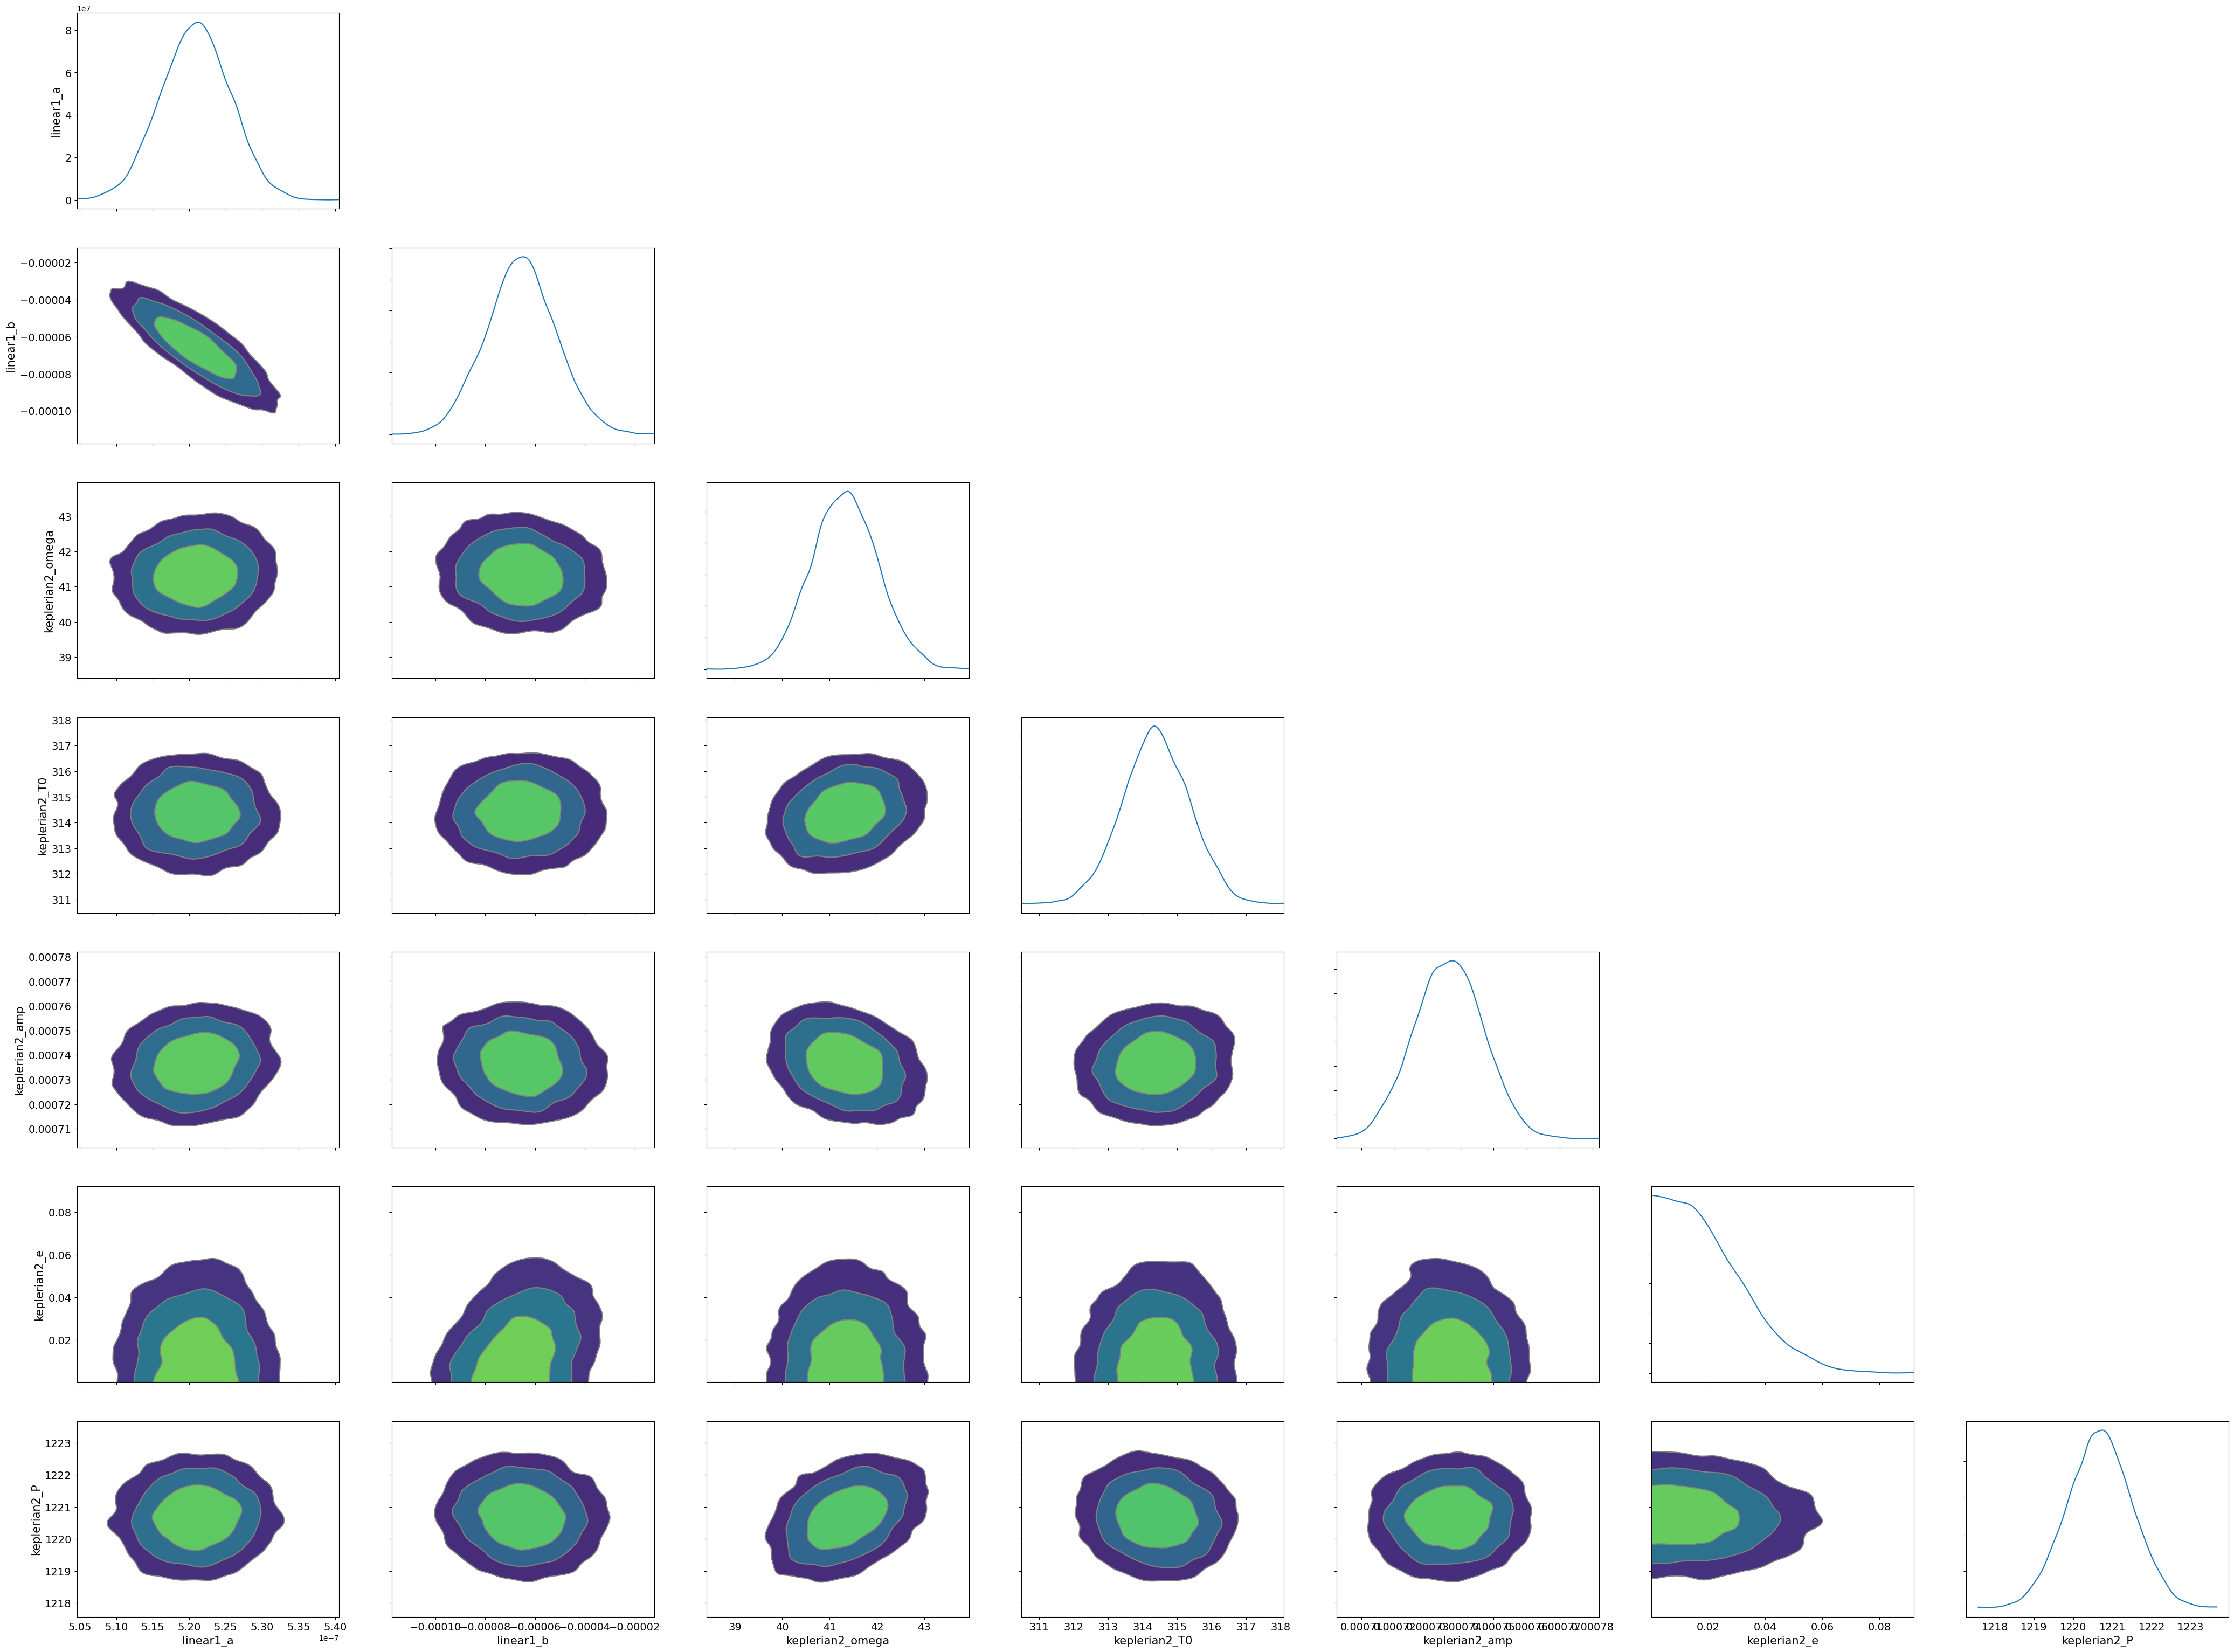

<Figure size 800x800 with 0 Axes>

In [22]:
oc6.create_corner_plot(idata_mix2)